# Определение закономерности успешности игр

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Шаг. Импортируем библиотеки

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

## Шаг.  Откройте файл с данными и изучите общую информацию

In [121]:
df = pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [123]:
df.duplicated().sum()

0

## Шаг. Подготовка данных

### Приведем названия столбцов к нижнему регистру

In [124]:
columns = df.columns
columns = columns.str.lower()
df.set_axis(columns, axis = 'columns', inplace = True)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Подсчитаем суммарные продажи и выведем в отдельный столбец

In [125]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

### "tbd"

In [126]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E,6.70
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,3.97
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T,2.81
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,2.42
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E,2.40
...,...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E,0.01
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E,0.01
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E,0.01
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E,0.01


Рейтинг tbd расшифровывается как To Be Determined ("предстоит определить").
Значит рейтинг данного продукта по какой-то причине пока не определен.

#### Сравнить средние показатели по столбцу total_sales, у позиций по которым предстоить оценку пользователей и всем остальным

In [127]:
df[df['user_score'] == 'tbd']['total_sales'].mean()

0.18816006600660068

In [128]:
df[df['user_score'] != 'tbd']['total_sales'].mean()

0.5919536771394583

Среднее количество проданных копий игр, для которых не получилось определить рейтинг, более чем в три раза ниже.
Из всего этого следует, что tbd можно заменить на NaN.

In [129]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = 'NaN'

### Преобразуем типы данных

#### Посмотрим уникальные значения в столбцах, которые возможно потребуют преобразования

In [130]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [131]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'NaN', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Преобразуем данные в следующих столбцах:

- year_of_release - в int, год ведь не может быть дробным.
- critic_score - значения только целочисленные, но для выведения корреляции с общим количество продаж нам нужно, чтобы обе колонки были в едином формате, поэтому менять тип не будем.
- user_score - а тут наоборот, значения не натуральные, столбец должен быть во float

In [132]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['user_score'] = df['user_score'].astype('float')

In [133]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### Обработка пропусков

Заменять отсутствующие значения не будем, отсутствуют очевидные логика для заполнения.

#### избавимся от строк с пропуском в колонке "name"

In [134]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


In [135]:
df.dropna(subset=['name'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


In [136]:
df[df['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Вероятная причина пропусков:

* старый года выпуска
* недостаточной популярности проектов
* ошибках при выгрузке данных

## Шаг. Исследовательский анализ данных

### Сколько игр выпускалось в разные годы?

In [137]:
x = df.sort_values(by = 'year_of_release')
x['year_of_release'].unique()

<IntegerArray>
[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, <NA>]
Length: 38, dtype: Int64

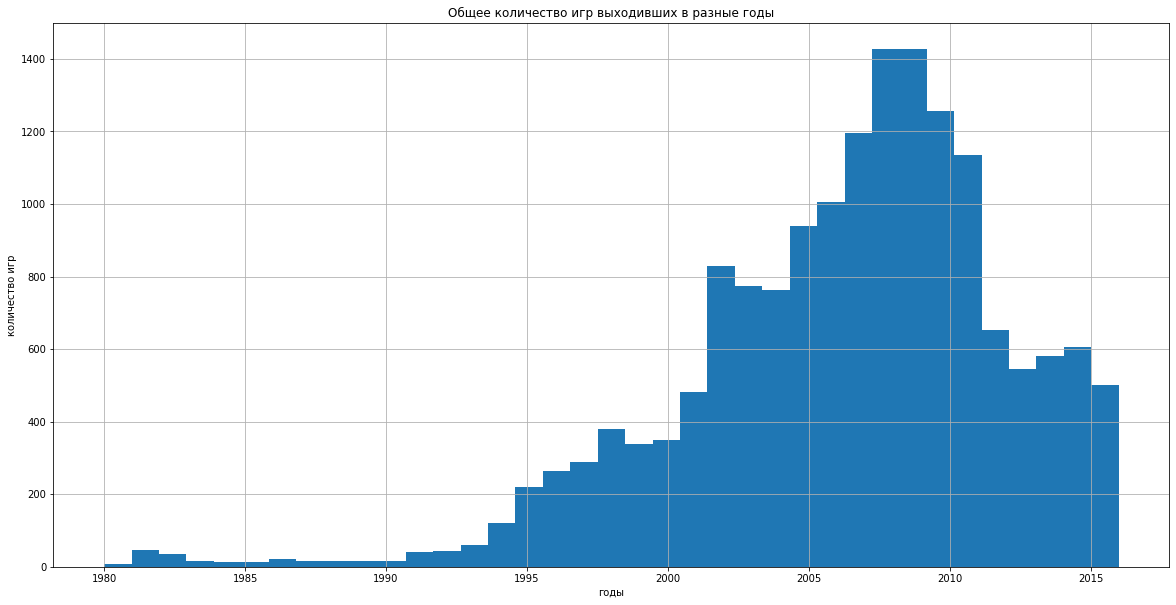

In [138]:
plt.figure(figsize=(20,10))
df['year_of_release'].hist(bins=37)
plt.title('Общее количество игр выходивших в разные годы')
plt.xlabel('годы')
plt.ylabel('количество игр')
plt.show()

</div>
<div class="alert alert-info">
<font size="4"><b> Подскаите, в этом случе, куда разносятся игры с неуказанной датой релиза? </b></font>

### Как менялись продажи по платформам?

In [139]:
len(df['platform'].unique())

31

#### распределение по количеству проектов среди платформ

In [140]:
game_platform = df.pivot_table(index = 'platform', values = 'name', aggfunc = 'count').reset_index()
game_platform.sort_values(by = 'name', ascending = False)

,platform,name
16,PS2,2161
4,DS,2151
17,PS3,1331
26,Wii,1320
28,X360,1262
19,PSP,1209
15,PS,1197
13,PC,974
29,XB,824
6,GBA,822


#### Лидеры по продажам среди платформ

In [141]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

#### Выделим список лидеров по продажам среди платформ, продажи свыше 500 мил.:

In [142]:
all_time_leaders = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

#### Выведем отдельные графики для платформ попавших в список лидеров по продажам:

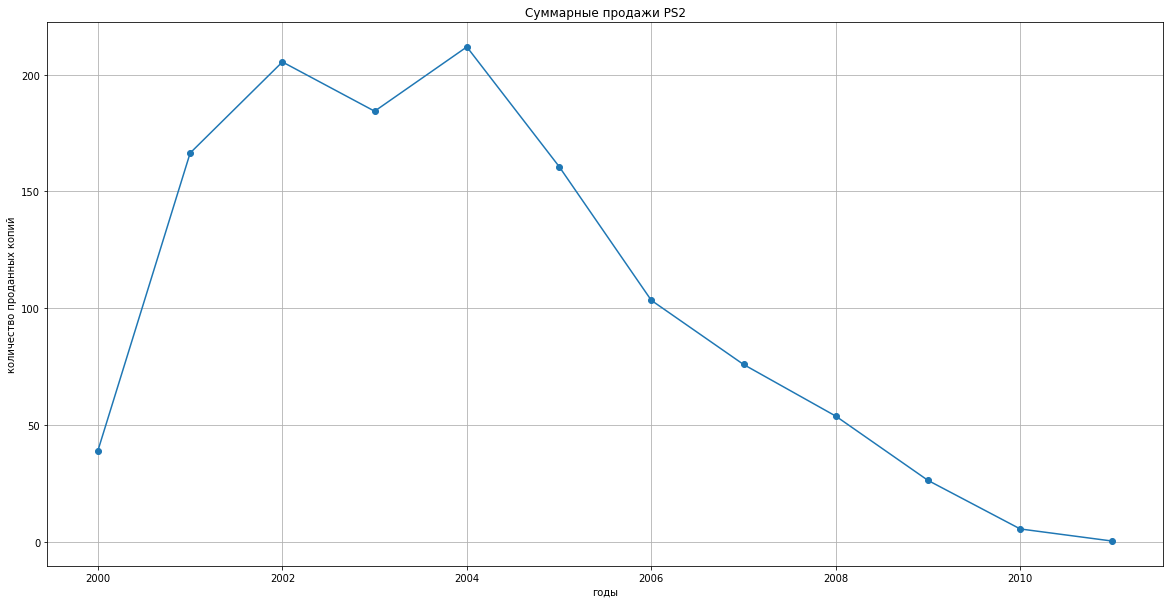

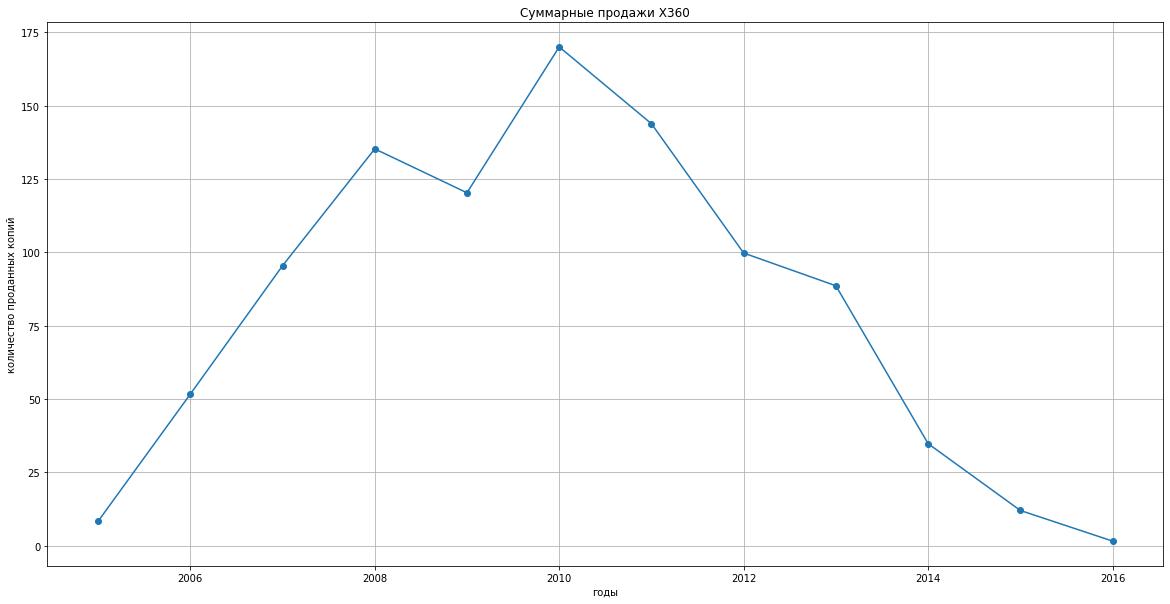

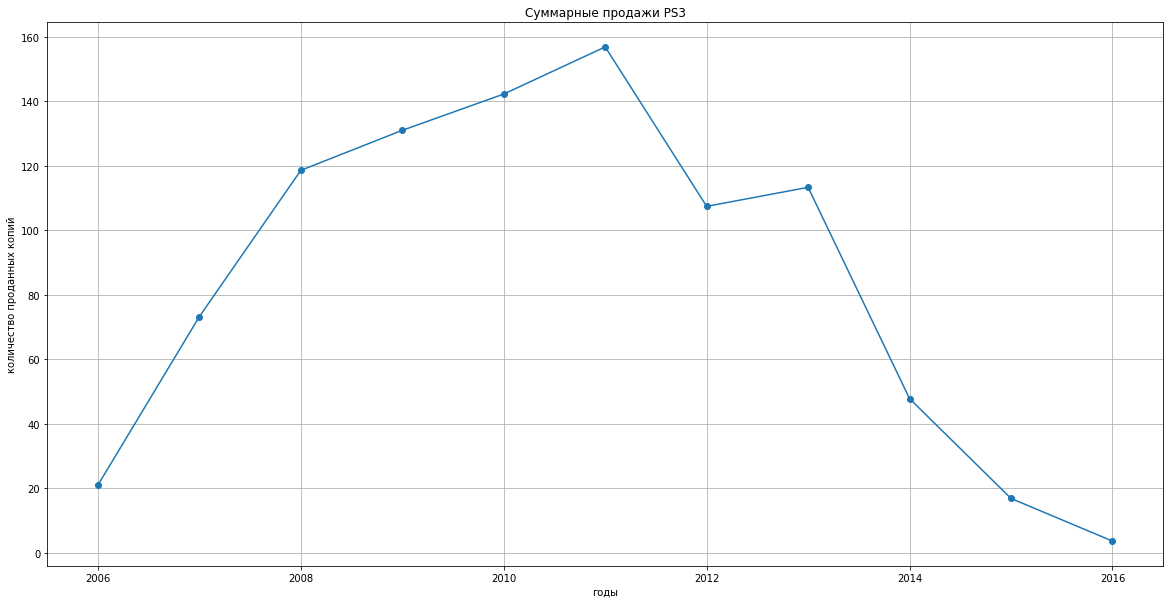

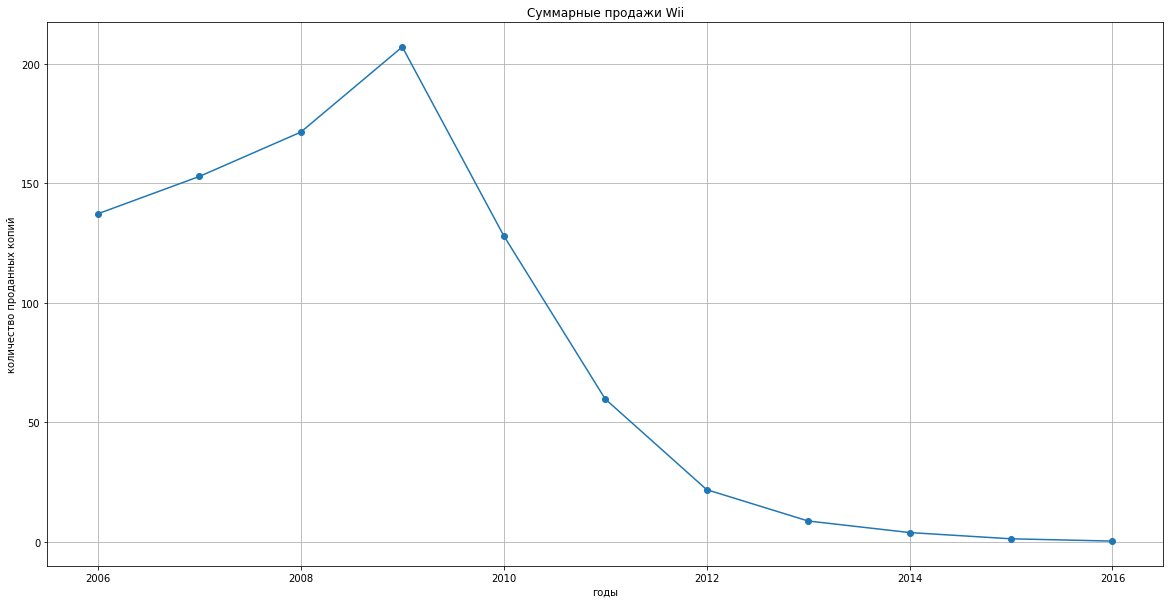

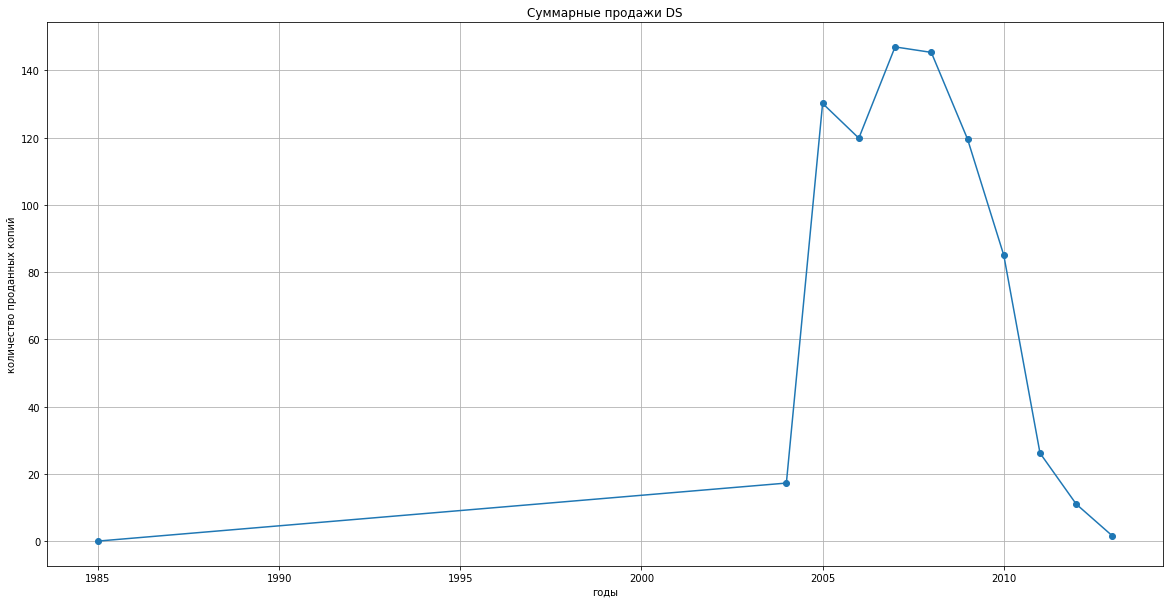

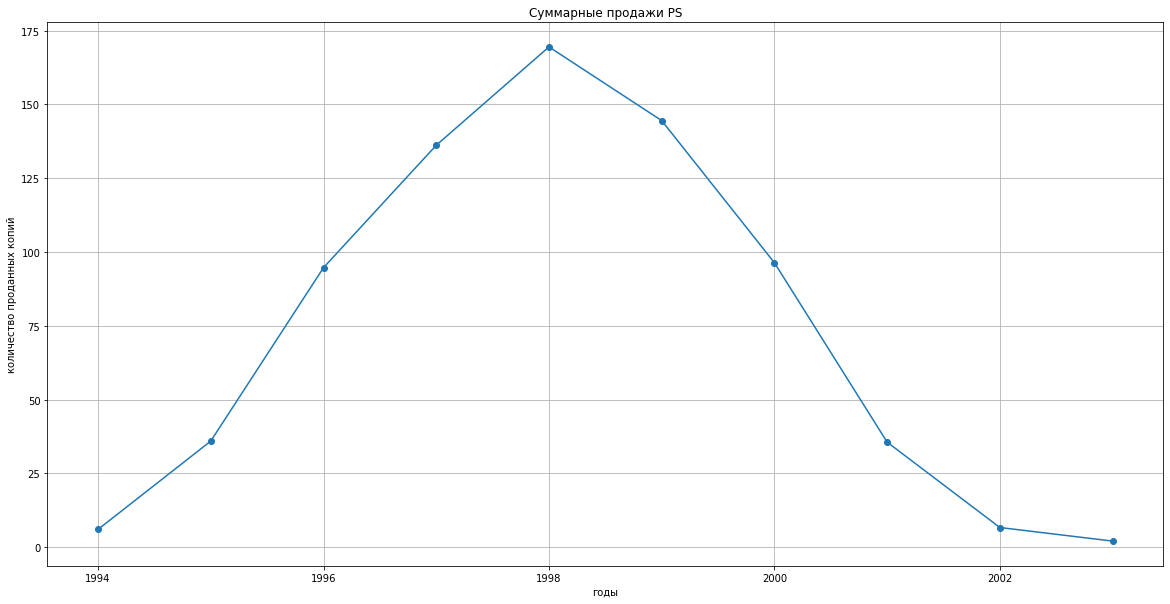

In [143]:
for platform in all_time_leaders:
    plt.figure(figsize=(20,10))
    data_pivot = df[df['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    data_pivot.plot(grid=True, style='o-')
    plt.title('Суммарные продажи ' + platform)
    plt.xlabel('годы')
    plt.ylabel('количество проданных копий')
    plt.show()

Обнаружили выброс в платформе DS.
Игра выпущенная в 1985, для консоли, поступившей в продажу в 2004году. Удалим ее.

In [144]:
df[(df['platform'] == 'DS') & (df['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


In [145]:
df = df.drop(index=[15957]).reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16712 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


#### Определим среднюю продолжительность жизни платформы

In [146]:
all_time_leaders = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [147]:
sum_year = 0
count = 0

for platform in all_time_leaders:
    sum_year += df[df['platform'] == platform]['year_of_release'].max()-df[df['platform'] == platform]['year_of_release'].min()
    count += 1
    
sum_year/count

10.0

Средняя продолжительность жизни для платформы - 10 лет.

### Сформируем таблицу актуальных данных

Для того чтобы избежать неактализированные тренды в быстроменяющейся индустрии, возьмем за основу последние 3 года. 

In [148]:
ten_years_df = df[df['year_of_release'] >= 2014]
ten_years_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16704,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16709,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [149]:
ten_years_df.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')

year_of_release,2014,2015,2016
platform,,,
3DS,43.76,27.78,15.14
PC,13.28,8.52,5.25
PS3,47.76,16.82,3.60
PS4,100.00,118.90,69.25
PSP,0.24,0.12,NaN
PSV,11.90,6.25,4.25
Wii,3.75,1.14,0.18
WiiU,22.03,16.35,4.60
X360,34.74,11.96,1.52


In [150]:
our_list = list(ten_years_df[ten_years_df['year_of_release'] == 2016]['platform'].unique())
print('Актуальные платформы -', our_list)

Актуальные платформы - ['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii']


In [151]:
display(ten_years_df[ten_years_df['year_of_release'] == 2016].
        query('platform in @our_list').
        pivot_table(index='platform', values='total_sales', aggfunc='sum').
        sort_values(by = 'total_sales', ascending = False))

,total_sales
platform,
PS4,69.25
XOne,26.15
3DS,15.14
PC,5.25
WiiU,4.60
PSV,4.25
PS3,3.60
X360,1.52
Wii,0.18


Для дальнейшего анализа возьмем 6 лидирующие платформы: PS4, XOne, 3DS, PC, WiiU и PSV. Они же - потенциально наиболее прибыльные платформы.

#### Введем актуальную таблицу:

In [152]:
adf = ten_years_df[ten_years_df['year_of_release'] >= 2013]

In [153]:
actual_leaders = ['PS4', 'XOne', '3DS', 'PC', 'WiiU', 'PSV']

### Построим для них ящики с усами.

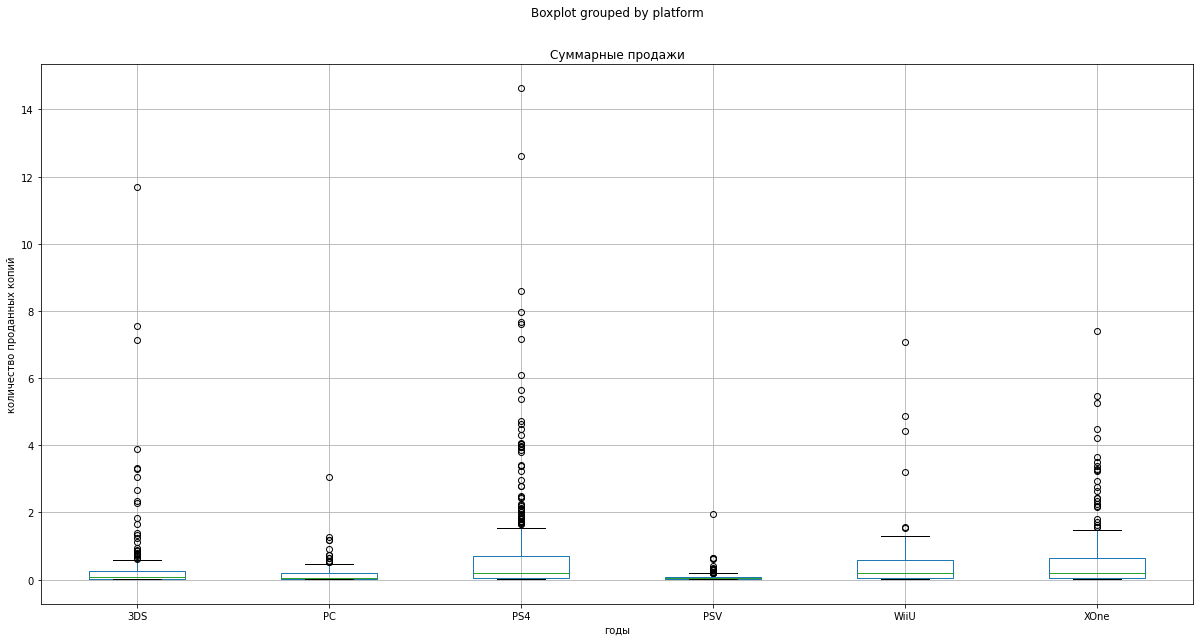

Среднее количество проданных копий игр для платформы PS4: 0.77 миллионов копий
Среднее количество проданных копий игр для платформы XOne: 0.62 миллионов копий
Среднее количество проданных копий игр для платформы 3DS: 0.41 миллионов копий
Среднее количество проданных копий игр для платформы PC: 0.18 миллионов копий
Среднее количество проданных копий игр для платформы WiiU: 0.59 миллионов копий
Среднее количество проданных копий игр для платформы PSV: 0.08 миллионов копий


In [154]:
#adf.boxplot('total_sales', by='platform')
adf.query('platform in @actual_leaders').boxplot('total_sales', by='platform', figsize=(20,10))
plt.title('Суммарные продажи')
plt.xlabel('годы')
plt.ylabel('количество проданных копий')
plt.show()

for platform in actual_leaders:
    print('Среднее количество проданных копий игр для платформы ' + platform + ': {:.2f} миллионов копий'.format(adf[adf['platform'] == platform]['total_sales'].mean()))

In [155]:
#for platform in actual_leaders:
#    plt.figure(figsize=(20,10))
#    adf[adf['platform'] == platform].boxplot('total_sales')
#    print('Среднее количество проданных копий игр для платформы ' + platform + ': {:.2f} миллионов копий'.format(adf[adf['platform'] == platform]['total_sales'].mean()))
#    plt.title('Суммарные продажи ' + platform)
#    plt.xlabel('годы')
#     plt.ylabel('количество проданных копий')
#     plt.show()

#### удалим выбросы и построим крафик с обновленными данными

In [156]:
index_list = adf.loc[(adf['total_sales']>1.8) & (adf['platform']=='PS4')].index
adf.drop(labels = index_list, axis = 0, inplace = True)

index_list = adf.loc[(adf['total_sales']>1.6) & (adf['platform']=='XOne')].index
adf.drop(labels = index_list, axis = 0, inplace = True)

index_list = adf.loc[(adf['total_sales']>0.9) & (adf['platform']=='3DS')].index
adf.drop(labels = index_list, axis = 0, inplace = True)

index_list = adf.loc[(adf['total_sales']>0.5) & (adf['platform']=='PC')].index
adf.drop(labels = index_list, axis = 0, inplace = True)

index_list = adf.loc[(adf['total_sales']>1.5) & (adf['platform']=='WiiU')].index
adf.drop(labels = index_list, axis = 0, inplace = True)

index_list = adf.loc[(adf['total_sales']>0.24) & (adf['platform']=='PSV')].index
adf.drop(labels = index_list, axis = 0, inplace = True)

adf = adf.reset_index(drop=True)

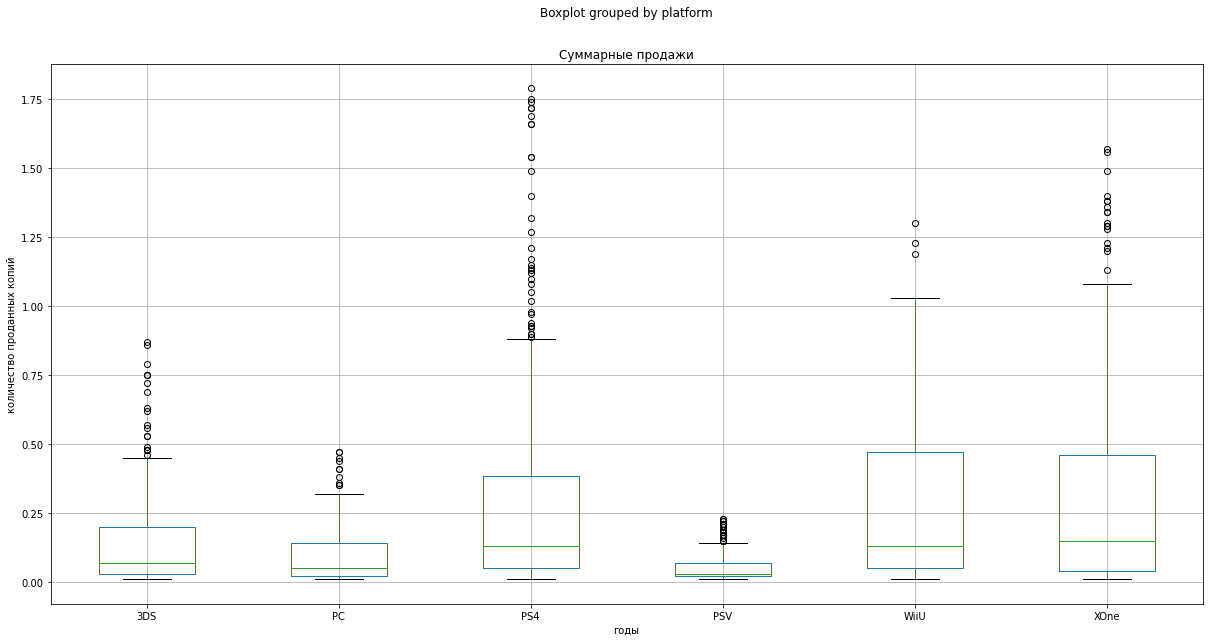

In [157]:
adf.query('platform in @actual_leaders').boxplot('total_sales', by='platform', figsize=(20,10))
plt.title('Суммарные продажи')
plt.xlabel('годы')
plt.ylabel('количество проданных копий')
plt.show()

Разброс по продажам очень велик, игры с количеством проданных копий более двух миллионов являются исключением для всех платформ.
Среднее количество проданных копий за последние 3 года, в разбивке по платформам, так же сильно отличается:

* 0.77 миллиона для PS4
* 0.62 миллиона для XOne
* 0.41 миллиона для 3DS
* 0.18 миллиона для PC
* 0.59 миллиона для WiiU
* 0.08 миллиона для PSV

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

#### Проведем анализ по платформе PS4

In [158]:
#adf[adf['platform'] == 'PS4'].info()

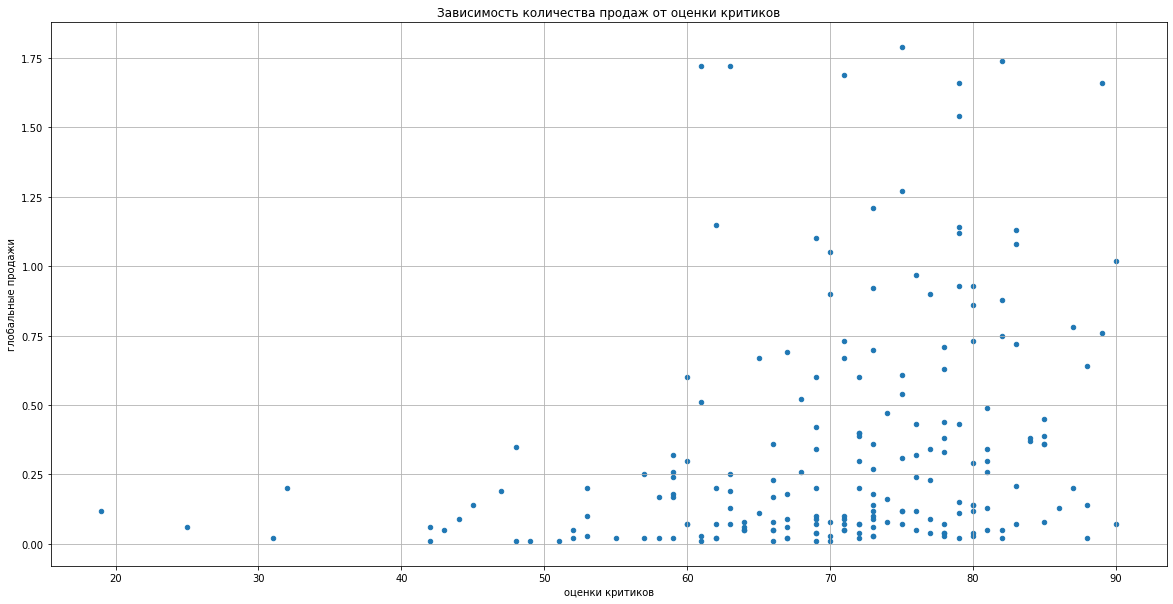

In [159]:
ps4_critic = adf[(adf['platform'] == 'PS4')].dropna(subset=['critic_score'])
ps4_critic.plot(
    x='critic_score', y='total_sales', kind='scatter', figsize=(20,10), sharex=False, grid=True)
plt.title('Зависимость количества продаж от оценки критиков')
plt.ylabel('глобальные продажи')
plt.xlabel('оценки критиков')
plt.show()

In [160]:
#ps4_critic

In [161]:
ps4_critic['critic_score'].corr(ps4_critic['total_sales'])

0.28055041332066405

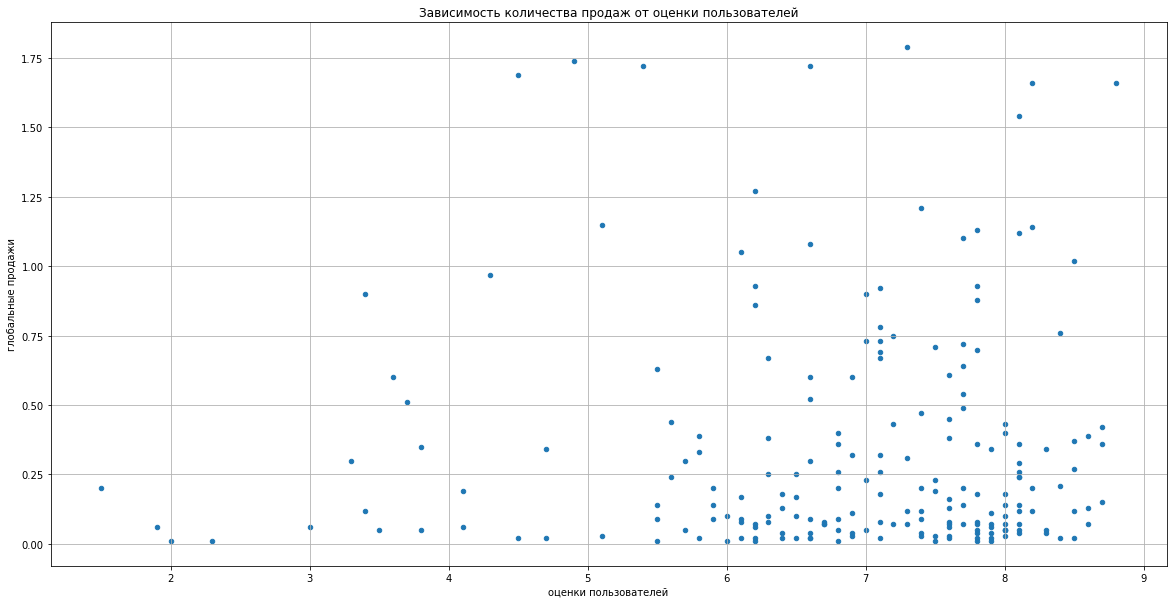

In [162]:
ps4_user = adf[(adf['platform'] == 'PS4')].dropna(subset=['user_score'])
ps4_user.plot(
    x='user_score', y='total_sales', kind='scatter', figsize=(20,10), sharex=False, grid=True)
plt.title('Зависимость количества продаж от оценки пользователей')
plt.ylabel('глобальные продажи')
plt.xlabel('оценки пользователей')
plt.show()

In [163]:
ps4_user['user_score'].corr(ps4_user['total_sales'])

0.010027286772691728

#### Проведем анализ по платформе XOne

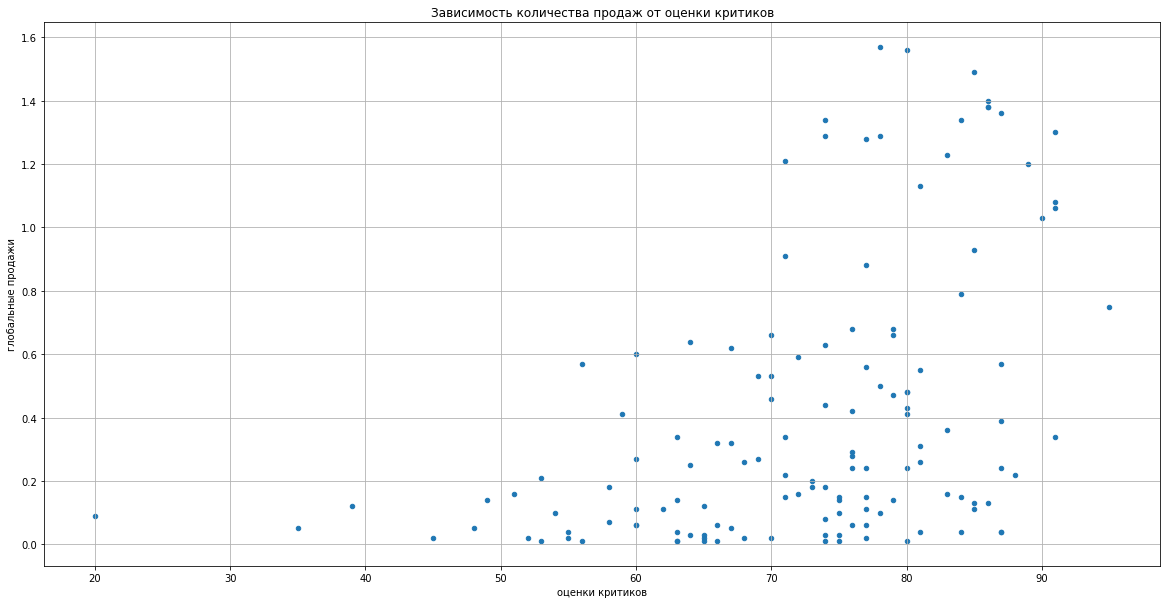

In [164]:
xone_critic = adf[(adf['platform'] == 'XOne')].dropna(subset=['critic_score'])
xone_critic.plot(
    x='critic_score', y='total_sales', kind='scatter', figsize=(20,10), sharex=False, grid=True)
plt.title('Зависимость количества продаж от оценки критиков')
plt.ylabel('глобальные продажи')
plt.xlabel('оценки критиков')
plt.show()

In [165]:
xone_critic['critic_score'].corr(xone_critic['total_sales'])

0.44439189446821187

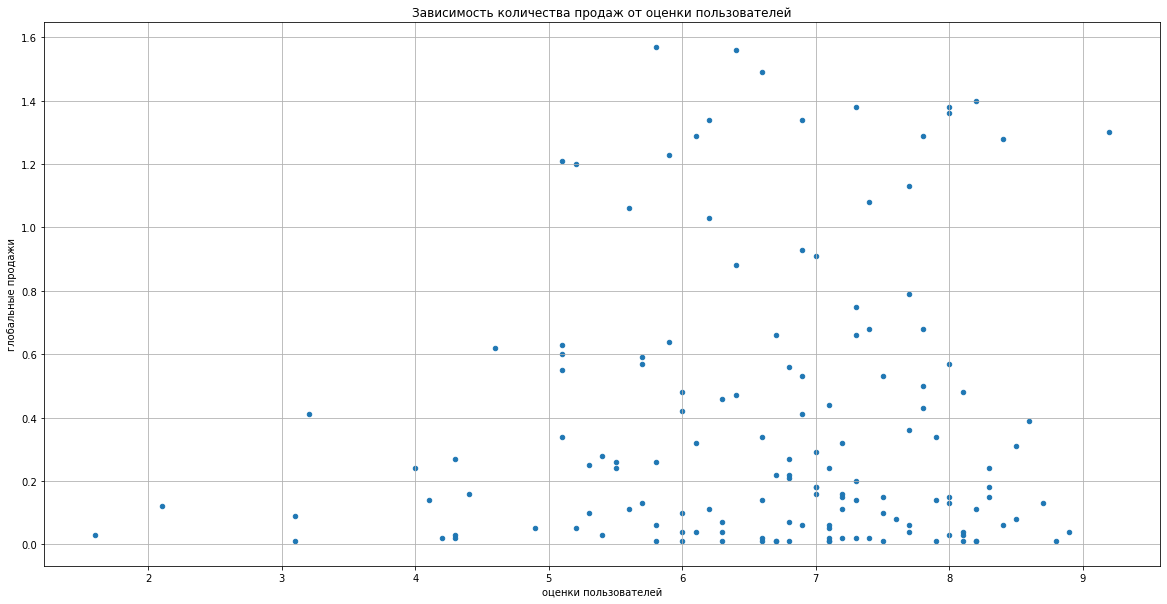

In [166]:
xone_critic = adf[(adf['platform'] == 'XOne')].dropna(subset=['user_score'])
xone_critic.plot(
    x='user_score', y='total_sales', kind='scatter', figsize=(20,10), sharex=False, grid=True)
plt.title('Зависимость количества продаж от оценки пользователей')
plt.ylabel('глобальные продажи')
plt.xlabel('оценки пользователей')
plt.show()

In [167]:
xone_critic['user_score'].corr(xone_critic['total_sales'])

0.07110031487405424

#### Проведем анализ по платформе 3DS

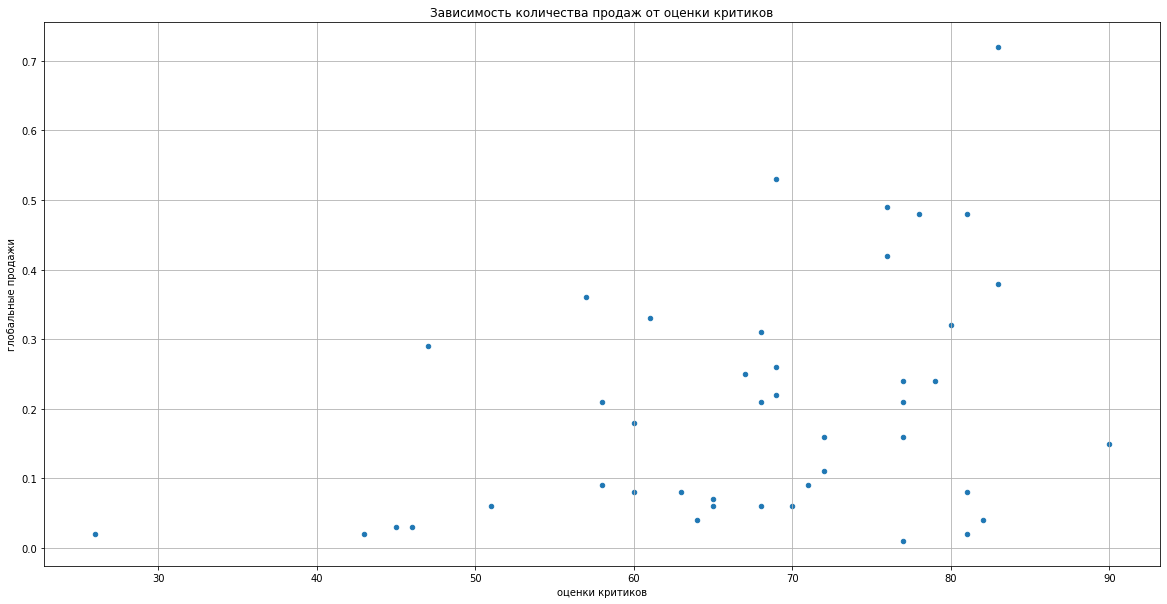

In [168]:
threeds_critic = adf[(adf['platform'] == '3DS')].dropna(subset=['critic_score'])
threeds_critic.plot(
    x='critic_score', y='total_sales', kind='scatter', figsize=(20,10), sharex=False, grid=True)
plt.title('Зависимость количества продаж от оценки критиков')
plt.ylabel('глобальные продажи')
plt.xlabel('оценки критиков')
plt.show()

In [169]:
threeds_critic['critic_score'].corr(threeds_critic['total_sales'])

0.3755894983261854

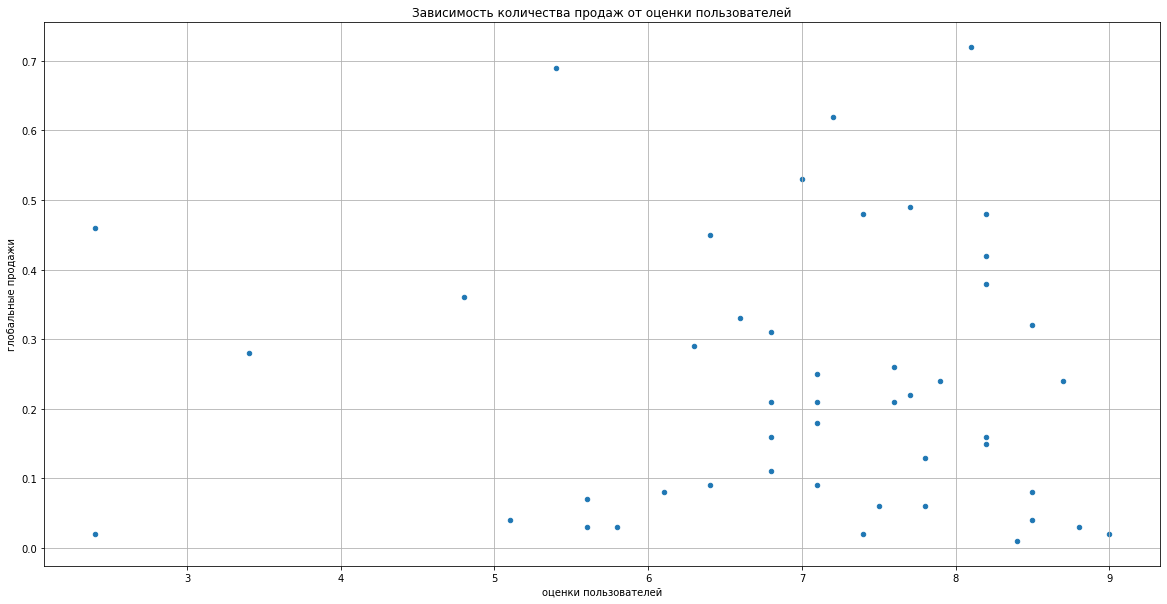

In [170]:
threeds_critic = adf[(adf['platform'] == '3DS')].dropna(subset=['user_score'])
threeds_critic.plot(
    x='user_score', y='total_sales', kind='scatter', figsize=(20,10), sharex=False, grid=True)
plt.title('Зависимость количества продаж от оценки пользователей')
plt.ylabel('глобальные продажи')
plt.xlabel('оценки пользователей')
plt.show()

In [171]:
threeds_critic['user_score'].corr(threeds_critic['total_sales'])

-0.042550441126567785

#### Проведем анализ по платформе PC

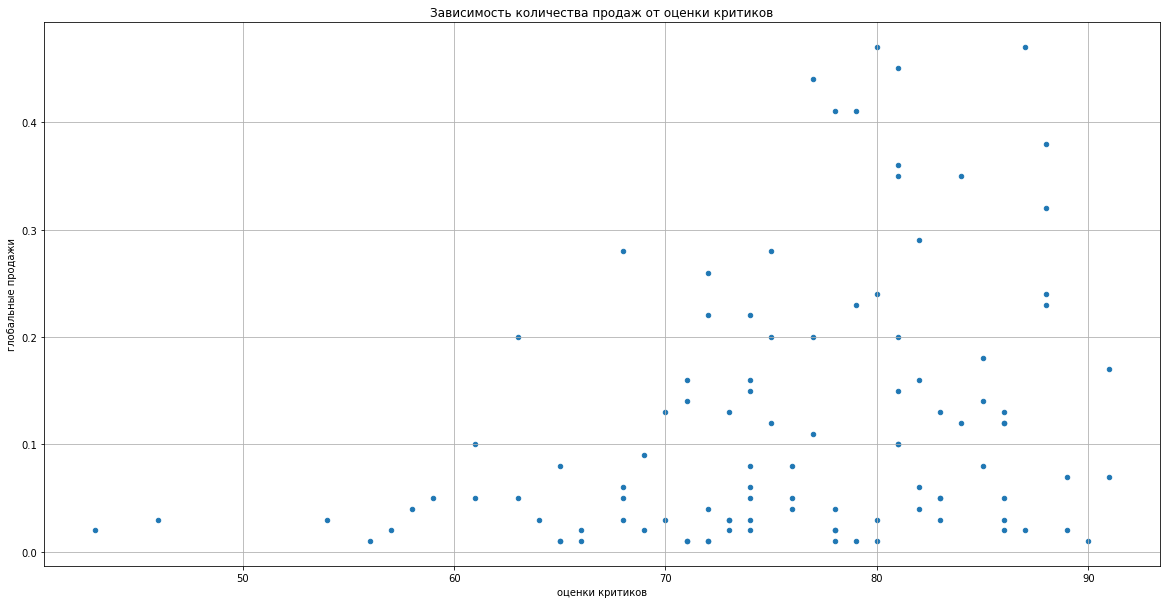

In [172]:
pc_critic = adf[(adf['platform'] == 'PC')].dropna(subset=['critic_score'])
pc_critic.plot(
    x='critic_score', y='total_sales', kind='scatter', figsize=(20,10), sharex=False, grid=True)
plt.title('Зависимость количества продаж от оценки критиков')
plt.ylabel('глобальные продажи')
plt.xlabel('оценки критиков')
plt.show()

In [173]:
pc_critic['critic_score'].corr(pc_critic['total_sales'])

0.31842233223265504

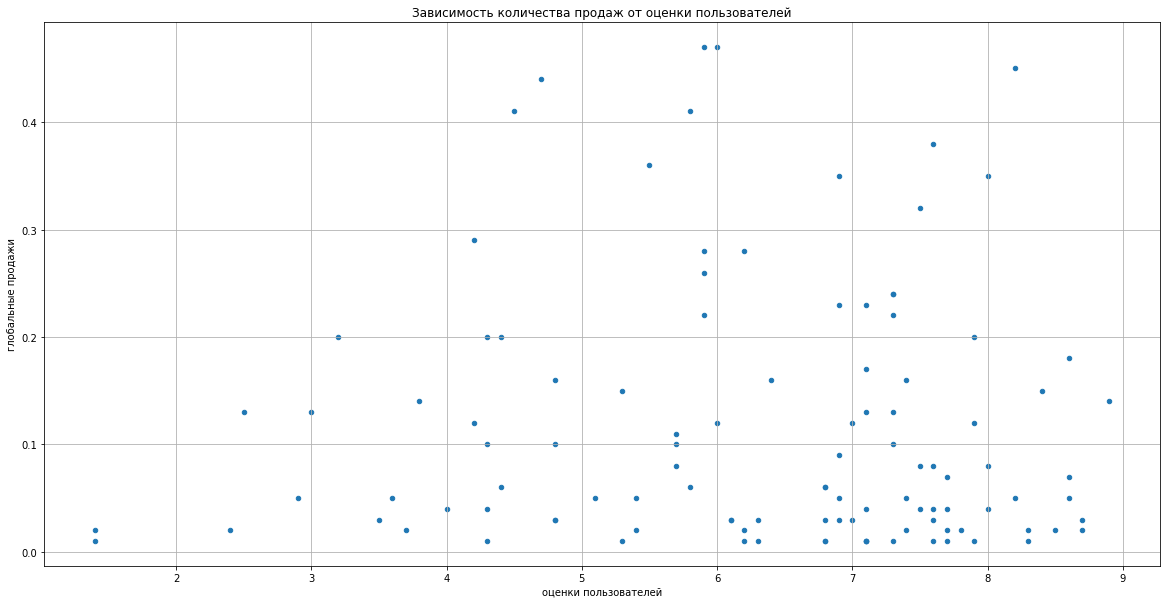

In [174]:
pc_critic = adf[(adf['platform'] == 'PC')].dropna(subset=['user_score'])
pc_critic.plot(
    x='user_score', y='total_sales', kind='scatter', figsize=(20,10), sharex=False, grid=True)
plt.title('Зависимость количества продаж от оценки пользователей')
plt.ylabel('глобальные продажи')
plt.xlabel('оценки пользователей')
plt.show()

In [175]:
pc_critic['user_score'].corr(pc_critic['total_sales'])

-0.020849900689157062

#### Проведем анализ по платформе WiiU

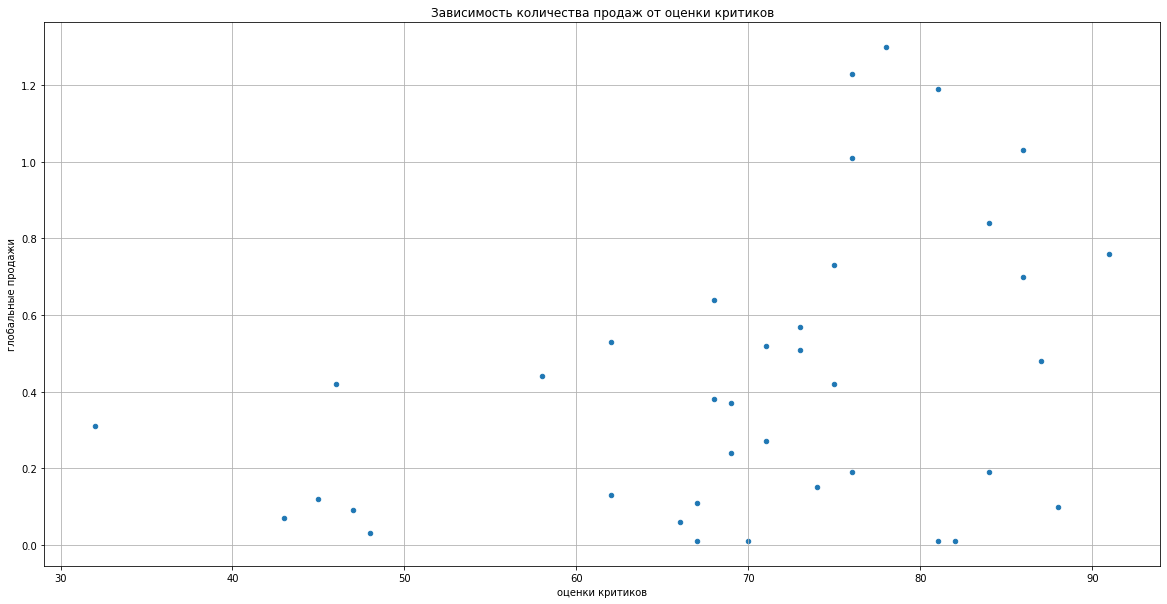

In [176]:
wiiu_critic = adf[(adf['platform'] == 'WiiU')].dropna(subset=['critic_score'])
wiiu_critic.plot(
    x='critic_score', y='total_sales', kind='scatter', figsize=(20,10), sharex=False, grid=True)
plt.title('Зависимость количества продаж от оценки критиков')
plt.ylabel('глобальные продажи')
plt.xlabel('оценки критиков')
plt.show()

In [177]:
wiiu_critic['critic_score'].corr(wiiu_critic['total_sales'])

0.3905310687435099

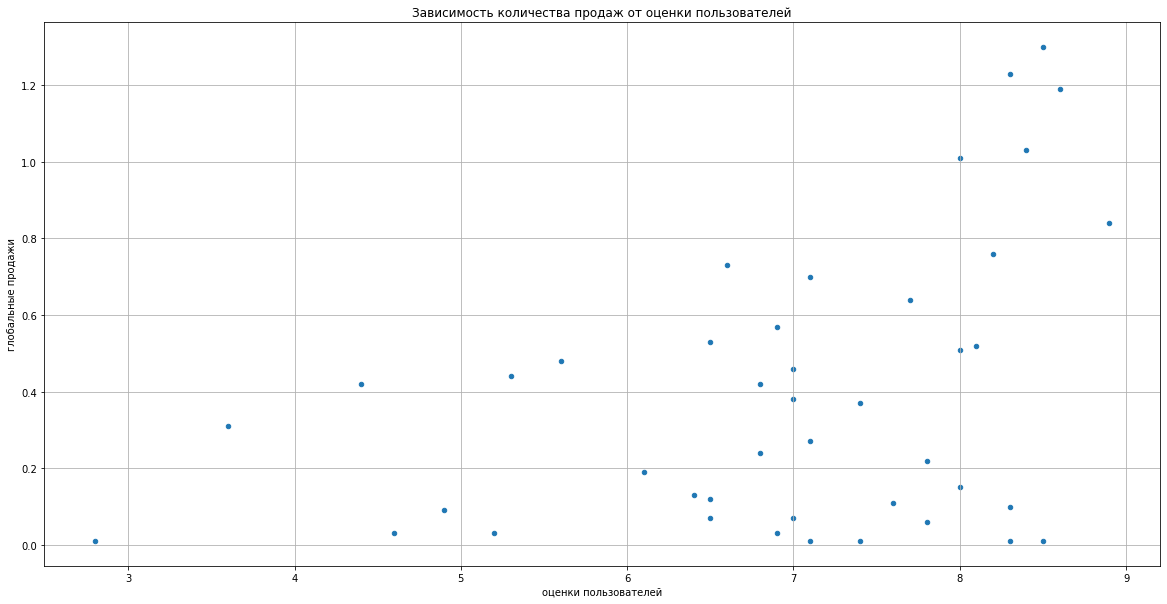

In [178]:
wiiu_critic = adf[(adf['platform'] == 'WiiU')].dropna(subset=['user_score'])
wiiu_critic.plot(
    x='user_score', y='total_sales', kind='scatter', figsize=(20,10), sharex=False, grid=True)
plt.title('Зависимость количества продаж от оценки пользователей')
plt.ylabel('глобальные продажи')
plt.xlabel('оценки пользователей')
plt.show()

In [179]:
wiiu_critic['user_score'].corr(wiiu_critic['total_sales'])

0.40568074774613866

#### Проведем анализ по платформе PSV

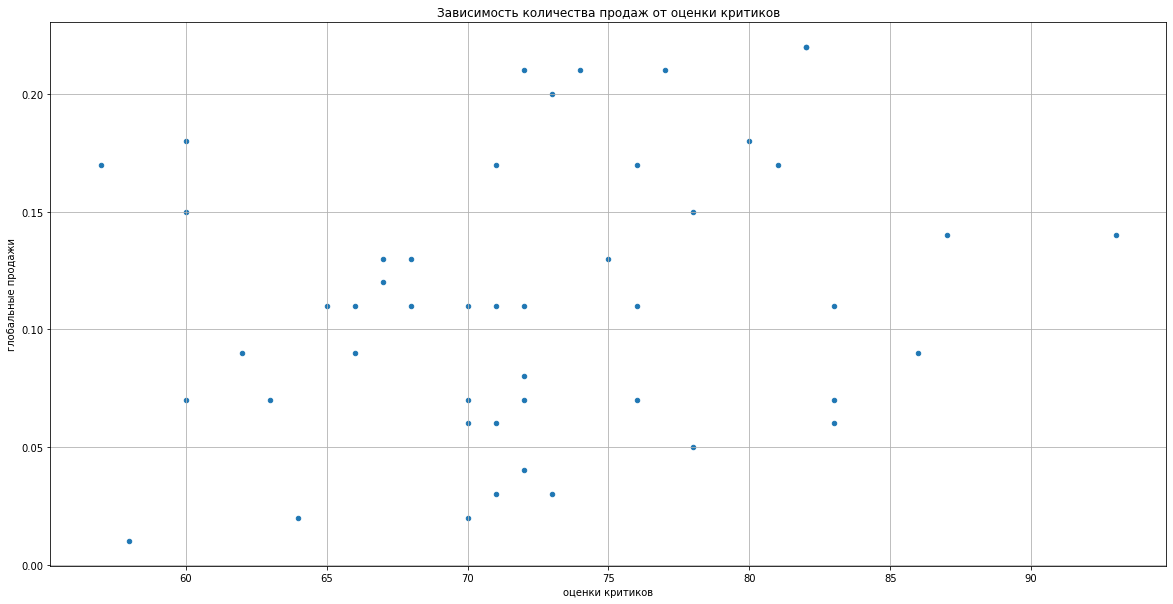

In [180]:
psv_critic = adf[(adf['platform'] == 'PSV')].dropna(subset=['critic_score'])
psv_critic.plot(
    x='critic_score', y='total_sales', kind='scatter', figsize=(20,10), sharex=False, grid=True)
plt.title('Зависимость количества продаж от оценки критиков')
plt.ylabel('глобальные продажи')
plt.xlabel('оценки критиков')
plt.show()

In [181]:
psv_critic['critic_score'].corr(psv_critic['total_sales'])

0.22957869296933267

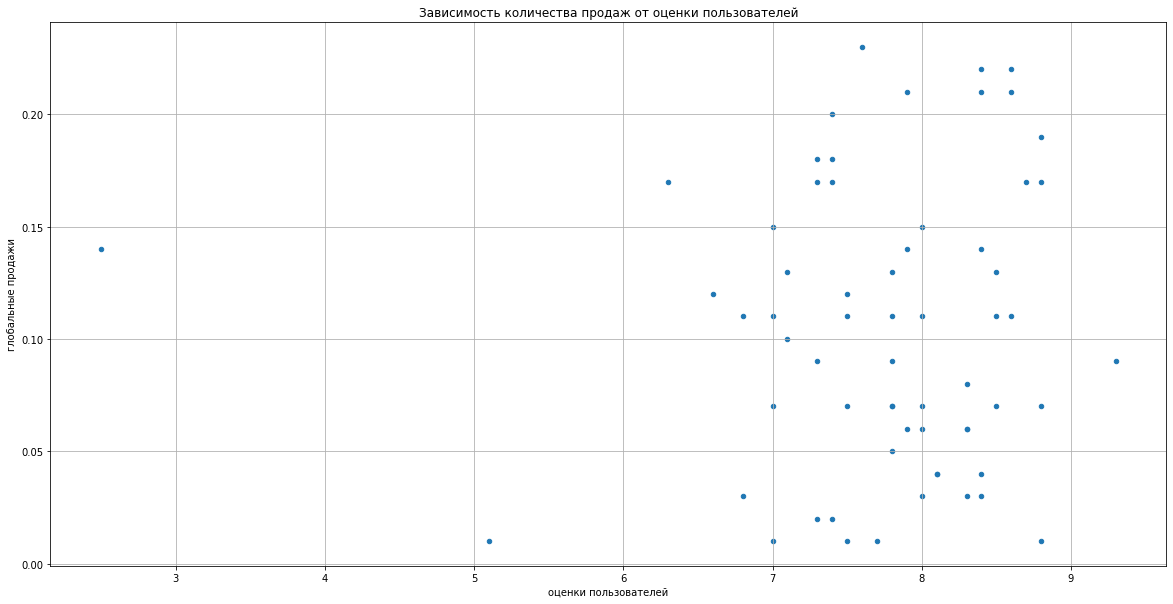

In [182]:
psv_critic = adf[(adf['platform'] == 'PSV')].dropna(subset=['user_score'])
psv_critic.plot(
    x='user_score', y='total_sales', kind='scatter', figsize=(20,10), sharex=False, grid=True)
plt.title('Зависимость количества продаж от оценки пользователей')
plt.ylabel('глобальные продажи')
plt.xlabel('оценки пользователей')
plt.show()

In [183]:
psv_critic['user_score'].corr(psv_critic['total_sales'])

0.04300248509278397

**Вывод:**

Как видим, количество продаж абсолютно не зависит от оценок пользователей.

А вот уровень корреляции количества продаж к оценокам критиков - средний. В особенности это заметно по платформе XOne

### Посмотрим распределение игр по жанрам

In [184]:
adf['genre'].value_counts()

Action          592
Role-Playing    200
Adventure       185
Sports          146
Misc            107
Shooter          97
Racing           65
Fighting         57
Simulation       40
Strategy         36
Platform         33
Puzzle           14
Name: genre, dtype: int64

Список лидеров по количеству созданных игр за последние 4 года:

1. Экшн
2. Ролевые
3. Приключения
4. Спорт
5. Шутеры

In [185]:
adf.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

genre
Action          119.76
Sports           58.42
Shooter          55.42
Role-Playing     45.00
Misc             26.28
Adventure        17.55
Racing           14.14
Fighting         13.02
Platform          8.23
Simulation        5.19
Strategy          3.44
Puzzle            2.21
Name: total_sales, dtype: float64

**Вывод:**
- На первом месте по продажам - экшн
- на втором месте - шутеры
- третье место - спортивные игры

In [186]:
adf.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

genre
Shooter         0.571340
Sports          0.400137
Platform        0.249394
Misc            0.245607
Fighting        0.228421
Role-Playing    0.225000
Racing          0.217538
Action          0.202297
Puzzle          0.157857
Simulation      0.129750
Strategy        0.095556
Adventure       0.094865
Name: total_sales, dtype: float64

In [187]:
adf.groupby('genre')['total_sales'].median().sort_values(ascending=False)

genre
Shooter         0.350
Sports          0.140
Fighting        0.110
Platform        0.100
Role-Playing    0.095
Action          0.080
Misc            0.080
Racing          0.080
Simulation      0.055
Strategy        0.055
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64

Наименее популярные жанры:

- пазлы
- стратегии
- приключения

**Выводы:**

1. жанр шутеры занял последнее пятое место в топ-5 по общему количеству игр за 4 года, находится на втором месте по суммарным продажам, и первое место в топ-5 по среднему показателю продаж. Это значит, что шутеров создают не много, но раскупают игры с значительно бОльшим интересом. Самый интересный жанр игр для рекламы.
2. спорт четвертое место в подборке по количеству игр, третье - по суммарным продажам, и второе место в топ-5 по среднему показателю продаж, хороший результат.
3. жанр платформеры имеет очень хороший показатель по средним продажам, третье место в топ-5, хотя и в рейтинге количества игр занимает девятое место, а по суммарным продажам - шестое.
4. жанр экшн занял первое место и по количеству игр созданных за последние 4 года, и в топ-5 по количеству проданных копий, но не попал даже в топ-5(седьмое место) по среднему показателю продаж. Не самый интересный жанр игр.
5. практически с равным результатом разделили 4 и 5 место в топ-5 по средним показателям продаж жанры ролевые и гонки, соответственно.

## Шаг. Портрет пользователя

### Составим портрет пользователя для каждого региона

<font size="4"><b> Топ-5 платформ 2013-2016 </b></font>

#### Платформы Северной Америки

In [188]:
adf.groupby('platform')['na_sales'].sum().sort_values(ascending=False)

platform
XOne    38.06
PS4     33.74
X360    28.30
PS3     22.05
WiiU     9.50
3DS      6.15
PC       3.24
Wii      2.08
PSV      1.47
PSP      0.00
Name: na_sales, dtype: float64

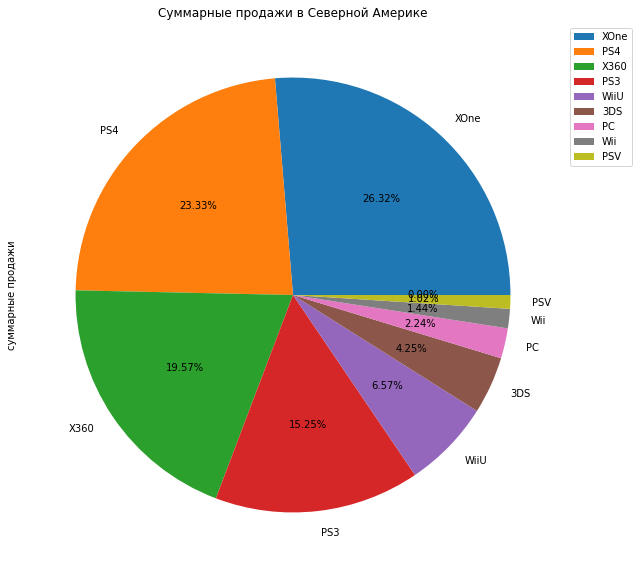

In [189]:
plt.figure(figsize=(20,10))
adf.groupby('platform')['na_sales'].sum().sort_values(ascending=False).plot(kind='pie', autopct='%1.2f%%')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Суммарные продажи в Северной Америке')
plt.ylabel('суммарные продажи')
plt.show()

**Топ-5 платформ для пользователей Северной Америки по суммарным продажам:**

1. PS4
2. XOne
3. X360
4. PS3
5. 3DS

In [190]:
adf.groupby('platform')['na_sales'].mean().sort_values(ascending=False)

platform
X360    0.254955
Wii     0.189091
XOne    0.185659
WiiU    0.141791
PS4     0.101934
PS3     0.100685
3DS     0.031538
PC      0.023650
PSV     0.005194
PSP     0.000000
Name: na_sales, dtype: float64

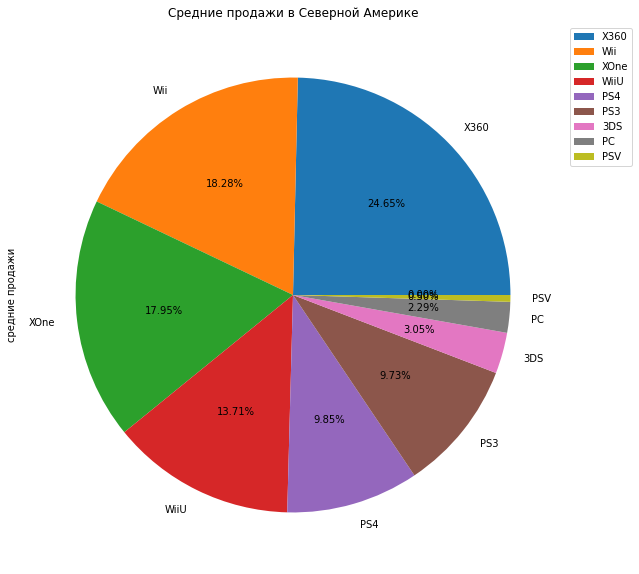

In [191]:
plt.figure(figsize=(20,10))
adf.groupby('platform')['na_sales'].mean().sort_values(ascending=False).plot(kind='pie', autopct='%1.2f%%')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Средние продажи в Северной Америке')
plt.ylabel('средние продажи')
plt.show()

**Топ-5 платформ для пользователей Северной Америки по средним продажам:**

1. X360
2. XOne
3. Wii
4. PS4
5. WiiU

#### Платформы Европы

In [192]:
adf.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)

platform
PS4     42.45
PS3     25.54
XOne    21.90
X360    15.49
PC       9.88
WiiU     6.77
3DS      5.63
Wii      2.59
PSV      1.74
PSP      0.00
Name: eu_sales, dtype: float64

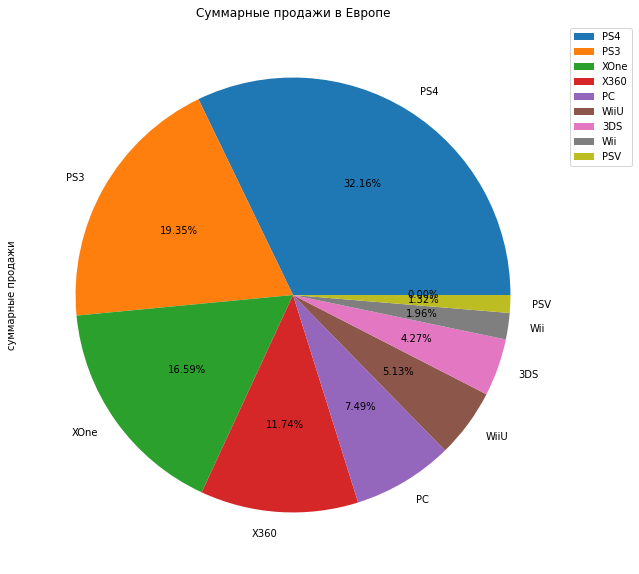

In [241]:
plt.figure(figsize=(20,10))
adf.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).plot(kind='pie', autopct='%1.2f%%')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Суммарные продажи в Европе')
plt.ylabel('суммарные продажи')
plt.show()

**Топ-5 платформ для пользователей Европы по суммарным продажам:**

1. PS4
2. PS3
3. XOne
4. X360
5. 3DS

In [194]:
adf.groupby('platform')['eu_sales'].mean().sort_values(ascending=False)

platform
Wii     0.235455
X360    0.139550
PS4     0.128248
PS3     0.116621
XOne    0.106829
WiiU    0.101045
PC      0.072117
3DS     0.028872
PSV     0.006148
PSP     0.000000
Name: eu_sales, dtype: float64

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


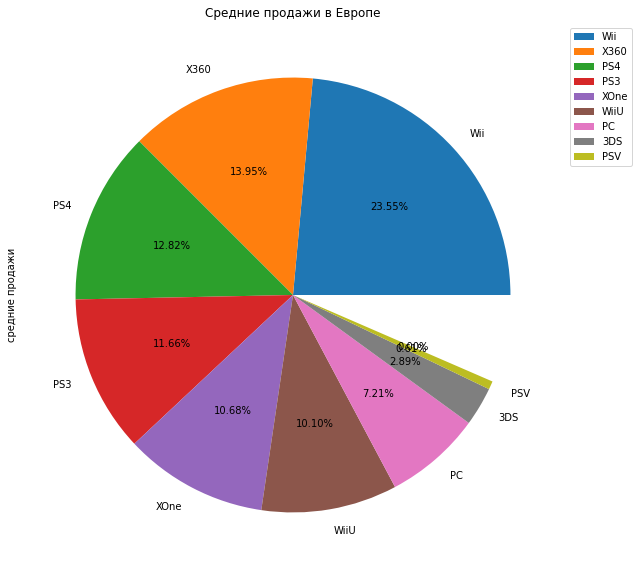

In [240]:
plt.figure(figsize=(20,10))
adf.groupby('platform')['eu_sales'].mean().sort_values(ascending=False).plot(kind='pie', autopct='%1.2f%%')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Средние продажи в Европе')
plt.ylabel('средние продажи')
plt.show()

**Топ-5 платформ для пользователей Европы по средним продажам:**

1. PS4
2. Wii
3. X360
4. XOne
5. PS3

#### Платформы Японии

In [196]:
adf.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

platform
3DS     17.12
PSV     11.75
PS3     11.22
PS4      9.75
WiiU     2.42
PSP      0.36
XOne     0.13
X360     0.08
PC       0.00
Wii      0.00
Name: jp_sales, dtype: float64

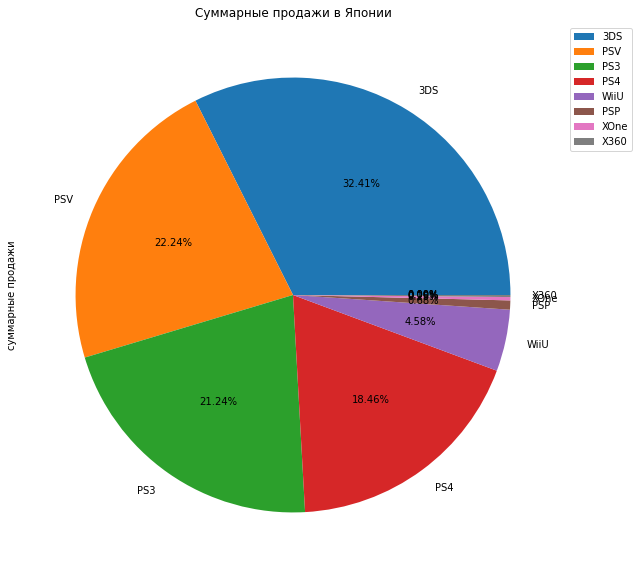

In [197]:
plt.figure(figsize=(20,10))
adf.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).plot(kind='pie', autopct='%1.2f%%')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Суммарные продажи в Японии')
plt.ylabel('суммарные продажи')
plt.show()

**Топ-5 платформ для пользователей Японии по суммарным продажам:**

1. 3DS
2. PS3
3. PSV
4. PS4
5. WiiU

In [198]:
adf.groupby('platform')['jp_sales'].mean().sort_values(ascending=False)

platform
3DS     0.087795
PS3     0.051233
PSV     0.041519
WiiU    0.036119
PS4     0.029456
PSP     0.027692
X360    0.000721
XOne    0.000634
PC      0.000000
Wii     0.000000
Name: jp_sales, dtype: float64

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


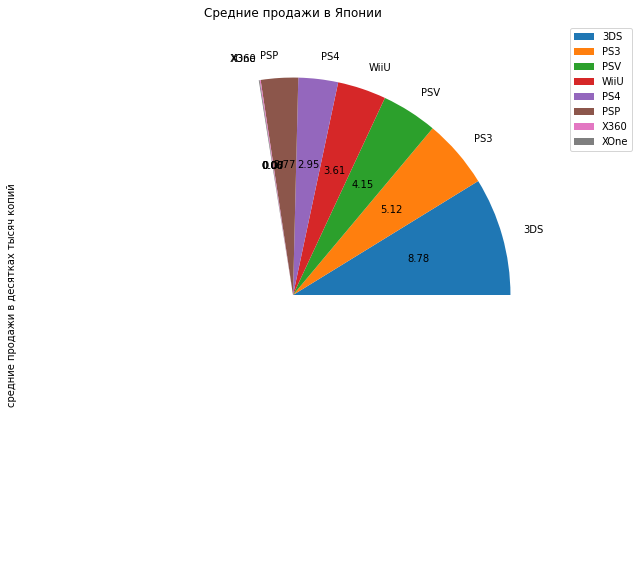

In [199]:
plt.figure(figsize=(20,10))
adf.groupby('platform')['jp_sales'].mean().sort_values(ascending=False).plot(kind='pie', autopct='%1.2f')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Средние продажи в Японии')
plt.ylabel('средние продажи в десятках тысяч копий')
plt.show()

**Топ-5 платформ для пользователей Японии по средним продажам:**

1. 3DS
2. WiiU
3. PS3
4. PSV
5. PSP

**Вывод:**

Для пользователей Северной Америки и Европы топ-5 очень схож, а вот Япония выделяется.
В топ-5 Японии преобладают портативные консоли. Видимо у японцев нет времени играть дома.

<font size="4"><b> Топ-5 жанров за 2013-2016 </b></font>

#### Жанры Северной Америки

In [200]:
adf.groupby('genre')['na_sales'].sum().sort_values(ascending=False)

genre
Action          44.86
Sports          27.06
Shooter         26.24
Role-Playing    15.20
Misc            10.92
Adventure        5.64
Fighting         5.06
Racing           4.00
Platform         3.16
Simulation       1.01
Strategy         0.79
Puzzle           0.65
Name: na_sales, dtype: float64

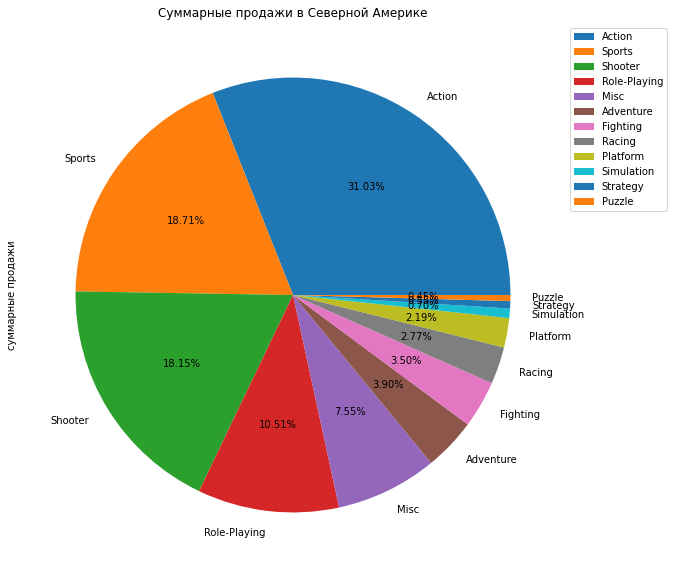

In [201]:
plt.figure(figsize=(20,10))
adf.groupby('genre')['na_sales'].sum().sort_values(ascending=False).plot(kind='pie', autopct='%1.2f%%')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Суммарные продажи в Северной Америке')
plt.ylabel('суммарные продажи')
plt.show()

**Топ-5 жанров для пользователей Северной Америки:**

1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Misc

In [202]:
adf.groupby('genre')['na_sales'].mean().sort_values(ascending=False)

genre
Shooter         0.270515
Sports          0.185342
Misc            0.102056
Platform        0.095758
Fighting        0.088772
Role-Playing    0.076000
Action          0.075777
Racing          0.061538
Puzzle          0.046429
Adventure       0.030486
Simulation      0.025250
Strategy        0.021944
Name: na_sales, dtype: float64

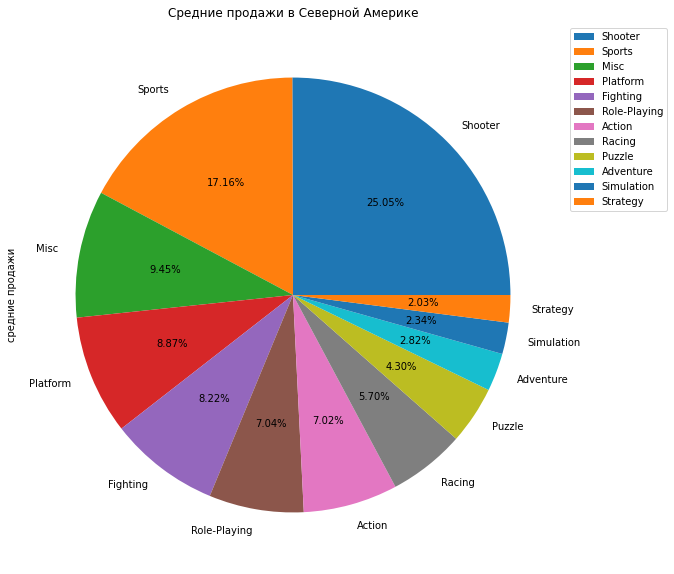

In [203]:
plt.figure(figsize=(20,10))
adf.groupby('genre')['na_sales'].mean().sort_values(ascending=False).plot(kind='pie', autopct='%1.2f%%')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Средние продажи в Северной Америке')
plt.ylabel('средние продажи')
plt.show()

**Топ-5 жанров для пользователей Северной Америки:**

1. Shooter
2. Sports
3. Platform
4. Fighting
5. Misc

#### Жанры Европы

In [204]:
adf.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)

genre
Action          42.68
Shooter         21.48
Sports          21.16
Role-Playing    11.44
Misc             8.68
Racing           8.20
Adventure        6.49
Platform         3.56
Fighting         3.44
Simulation       2.84
Strategy         1.50
Puzzle           0.52
Name: eu_sales, dtype: float64

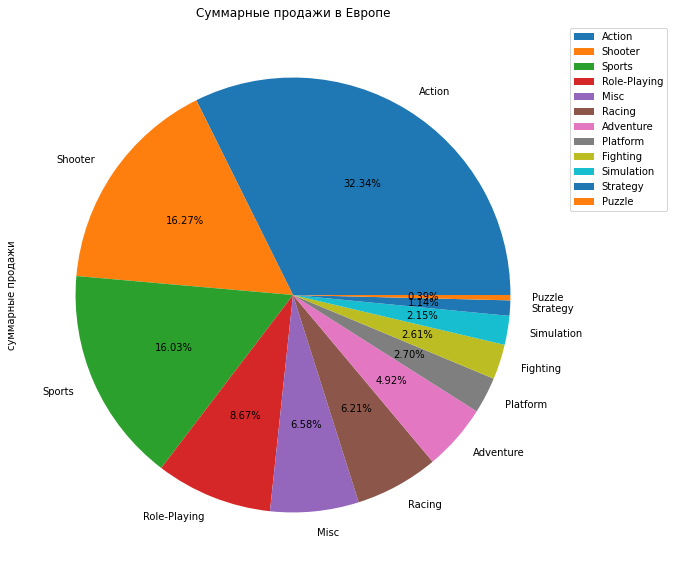

In [205]:
plt.figure(figsize=(20,10))
adf.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).plot(kind='pie', autopct='%1.2f%%')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Суммарные продажи в Европе')
plt.ylabel('суммарные продажи')
plt.show()

**Топ-5 жанров для пользователей Европы:**

1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Racing

In [206]:
adf.groupby('genre')['eu_sales'].mean().sort_values(ascending=False)

genre
Shooter         0.221443
Sports          0.144932
Racing          0.126154
Platform        0.107879
Misc            0.081121
Action          0.072095
Simulation      0.071000
Fighting        0.060351
Role-Playing    0.057200
Strategy        0.041667
Puzzle          0.037143
Adventure       0.035081
Name: eu_sales, dtype: float64

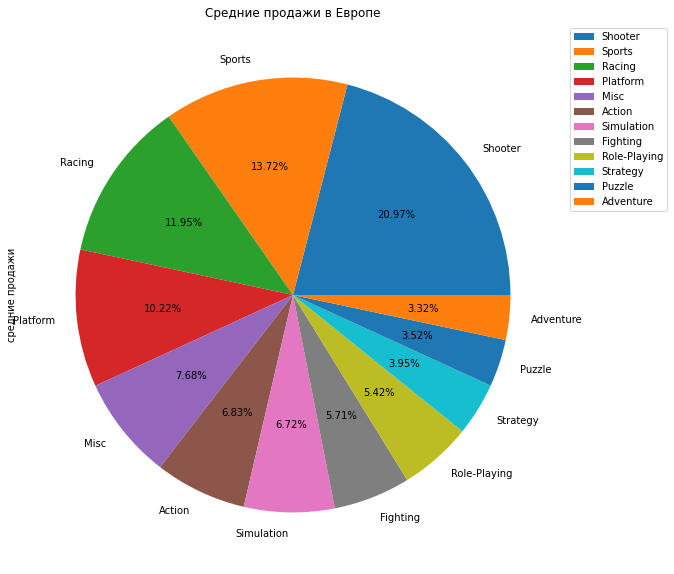

In [207]:
plt.figure(figsize=(20,10))
adf.groupby('genre')['eu_sales'].mean().sort_values(ascending=False).plot(kind='pie', autopct='%1.2f%%')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Средние продажи в Европе')
plt.ylabel('средние продажи')
plt.show()

**Топ-5 жанров для пользователей Европы:**

1. Shooter
2. Sports
3. Racing
4. Platform
5. Simulation

#### Жанры Японии

In [208]:
adf.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

genre
Action          20.02
Role-Playing    14.32
Misc             4.02
Adventure        3.60
Fighting         3.13
Sports           2.96
Shooter          1.10
Strategy         0.95
Puzzle           0.93
Simulation       0.91
Platform         0.51
Racing           0.38
Name: jp_sales, dtype: float64

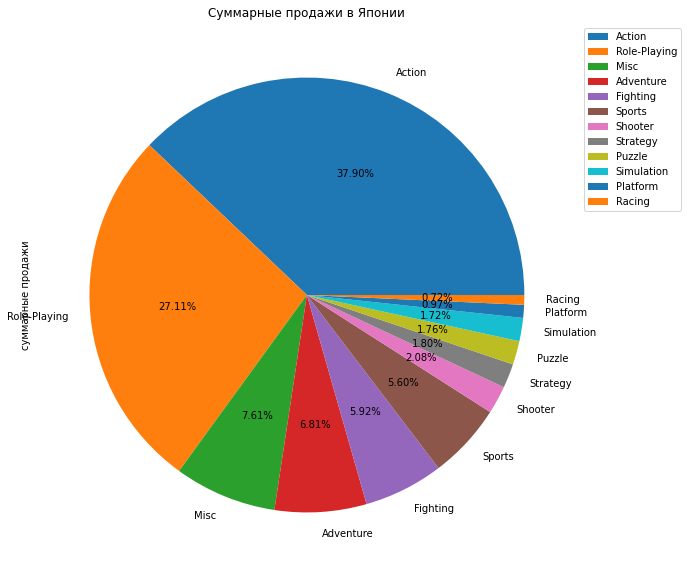

In [209]:
plt.figure(figsize=(20,10))
adf.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).plot(kind='pie', autopct='%1.2f%%')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Суммарные продажи в Японии')
plt.ylabel('суммарные продажи')
plt.show()

**Топ-5 жанров для пользователей Японии:**

1. Role-Playing
2. Action
3. Misc
4. Fighting
5. Shooter

In [210]:
adf.groupby('genre')['jp_sales'].mean().sort_values(ascending=False)

genre
Role-Playing    0.071600
Puzzle          0.066429
Fighting        0.054912
Misc            0.037570
Action          0.033818
Strategy        0.026389
Simulation      0.022750
Sports          0.020274
Adventure       0.019459
Platform        0.015455
Shooter         0.011340
Racing          0.005846
Name: jp_sales, dtype: float64

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


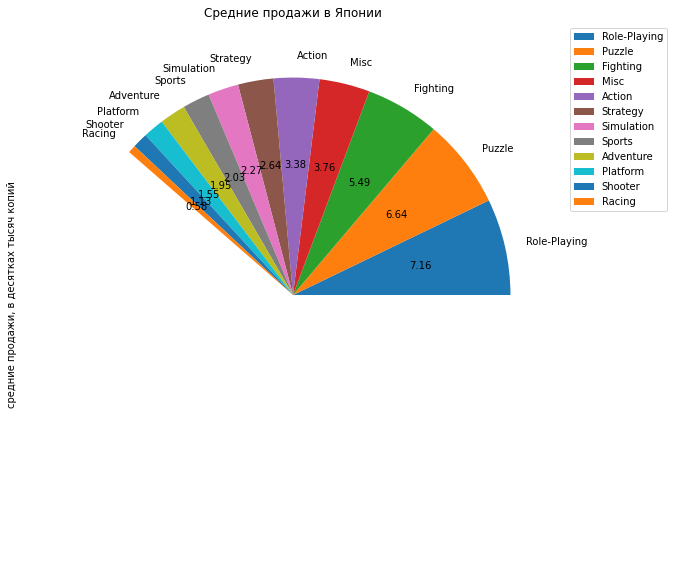

In [211]:
plt.figure(figsize=(20,10))
adf.groupby('genre')['jp_sales'].mean().sort_values(ascending=False).plot(kind='pie', autopct='%1.2f')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Средние продажи в Японии')
plt.ylabel('средние продажи, в десятках тысяч копий')
plt.show()

**Топ-5 жанров для пользователей Японии:**

1. Role-Playing
2. Fighting
3. Simulation
4. Puzzle
5. Platform

**Вывод:**
    
Видно, что проводить единую рекламную кампанию будет не правильно. У каждого региона свои предпочтения.

* В Японии, главную ставку нужно делать на ролевые игры; а в Америке и Европе они не особо популярны.
* В Северной Америке и Европе рекламная кампания должна акцентироваться в первую очередь - на шутерах, а во вторую - на спорте.
* Объединяет все регионы - платформеры.
* Европейцы заинтересованы в гонках.
* В Японии и Европе будут пользоваться популярностью симуляторы.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Информация по рейтингам:

1. «EC» («Early childhood») — «Для детей младшего возраста»
2. «E» («Everyone») — «Для всех»
3. «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
4. «T» («Teen») — «Подросткам»
5. «M» («Mature») — «Для взрослых»
6. «AO» («Adults Only 18+») — «Только для взрослых»
7. «RP» («Rating Pending») — «Рейтинг ожидается»

#### Заполним пропущенные значения рейтинга на unknown

In [222]:
adf['rating'] = adf['rating'].fillna('unknown')

#### Зависимость продаж от рейтинга в Северной Америке

In [224]:
#adf.groupby('rating')['na_sales'].mean().sort_values(ascending=False)

In [225]:
#adf['rating'].corr(adf['na_sales'], method='spearman')

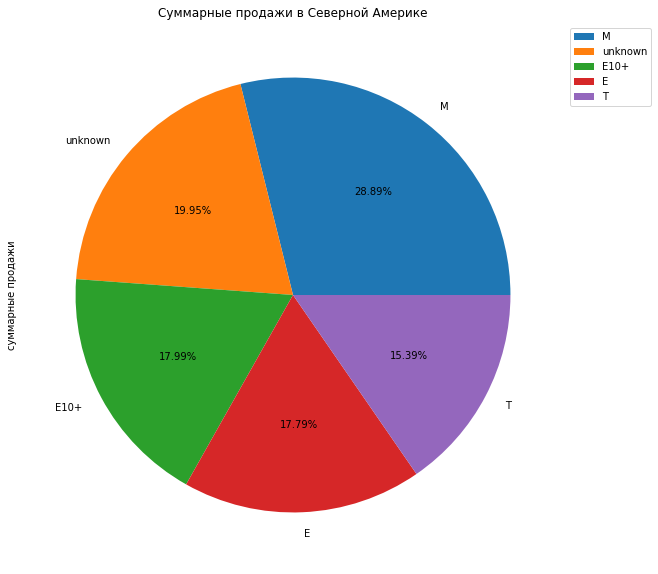

In [226]:
plt.figure(figsize=(20,10))
adf.groupby('rating')['na_sales'].sum().sort_values(ascending=False).plot(kind='pie', autopct='%1.2f%%')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Суммарные продажи в Северной Америке')
plt.ylabel('суммарные продажи')
plt.show()

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


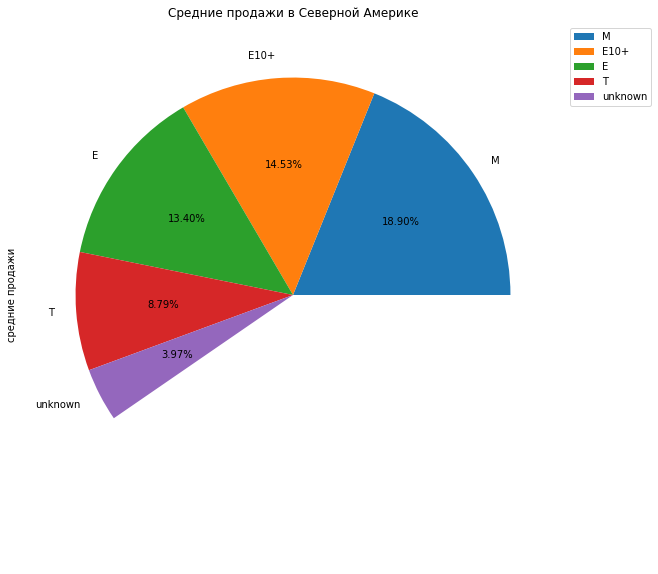

In [227]:
plt.figure(figsize=(20,10))
adf.groupby('rating')['na_sales'].mean().sort_values(ascending=False).plot(kind='pie', autopct='%1.2f%%')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Средние продажи в Северной Америке')
plt.ylabel('средние продажи')
plt.show()

**Вывод:** В Северной Америке покупатели в оснвном голосуют деньками за игры "Для взрослых", "Для всех" и "Для всех старке 10 лет"

#### Зависимость продаж от рейтинга в Европе

In [228]:
#adf.groupby('rating')['eu_sales'].mean().sort_values(ascending=False)

In [229]:
#adf['rating'].corr(adf['eu_sales'], method='spearman')

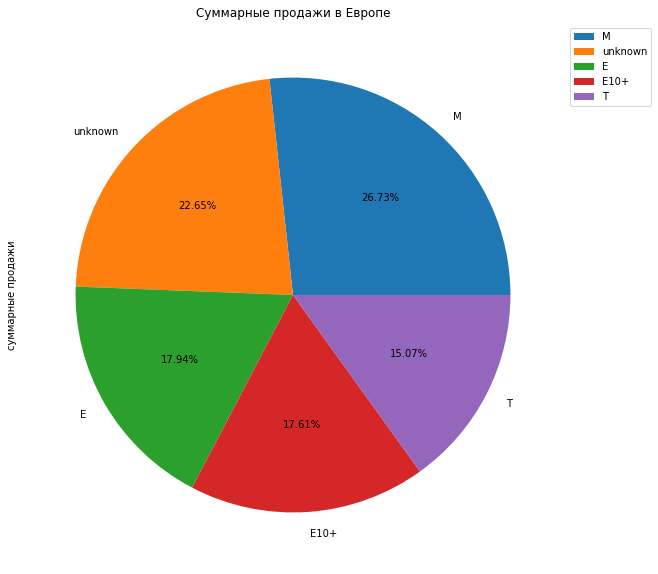

In [230]:
plt.figure(figsize=(20,10))
adf.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).plot(kind='pie', autopct='%1.2f%%')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Суммарные продажи в Европе')
plt.ylabel('суммарные продажи')
plt.show()

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


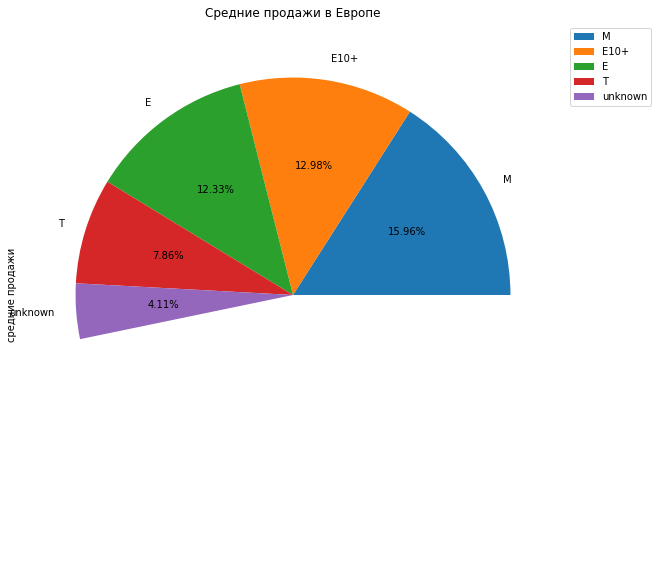

In [231]:
plt.figure(figsize=(20,10))
adf.groupby('rating')['eu_sales'].mean().sort_values(ascending=False).plot(kind='pie', autopct='%1.2f%%')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Средние продажи в Европе')
plt.ylabel('средние продажи')
plt.show()

**Вывод:** У Европы взаимосвязь аналогична Северной Америке

#### Зависимость продаж от рейтинга в Японии

In [232]:
#adf.groupby('rating')['jp_sales'].mean().sort_values(ascending=False)

In [233]:
#adf['rating'].corr(adf['jp_sales'], method='spearman')

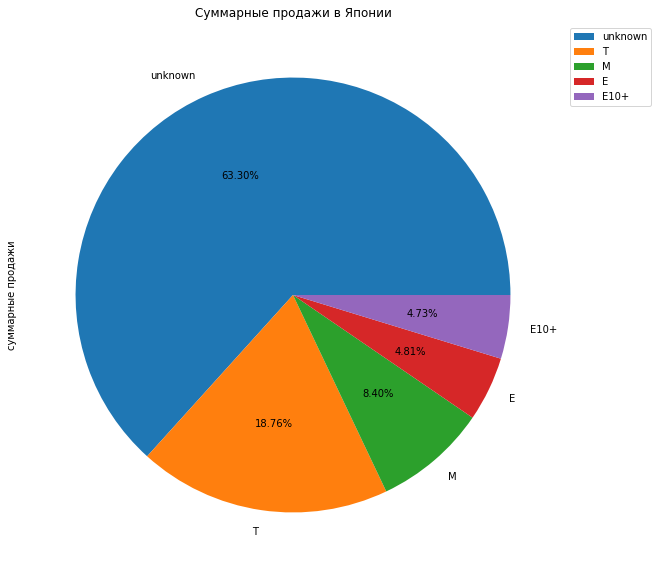

In [234]:
plt.figure(figsize=(20,10))
adf.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).plot(kind='pie', autopct='%1.2f%%')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Суммарные продажи в Японии')
plt.ylabel('суммарные продажи')
plt.show()

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


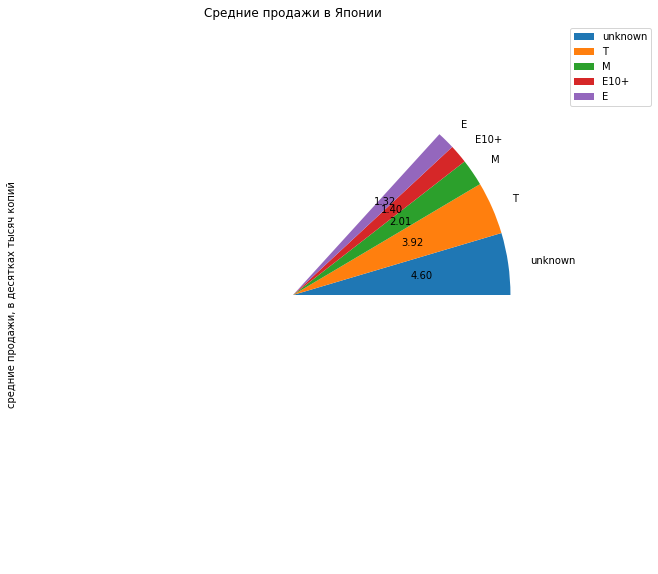

In [235]:
plt.figure(figsize=(20,10))
adf.groupby('rating')['jp_sales'].mean().sort_values(ascending=False).plot(kind='pie', autopct='%1.2f')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Средние продажи в Японии')
plt.ylabel('средние продажи, в десятках тысяч копий')
plt.show()

**Вывод:** Все же интересно, к каким рейтингам относятся игры по которым эту информацию не указали? Средние продажи по этим играм больше всего. 

Исходя из имеющейся информации, в Японии средние продажи для подростков опережают продажи по рейтингам лидирующим в Европе и Северной Америке. Это обьясняет преобладание игр для портативных консолей.

**Заключение.**

* Продажи в Северной Америке и Европе похожи;
* Если смотреть со стороны: В середнем, игры каких рейтингов продаются больше в денежном эквиваленте? Ответ: для Европы и Северной америки - это за игры "Для взрослых", "Для всех" и "Для всех старке 10 лет", а для Японии не все так понятно, хотя обнозначно можно сказать, что в японии преобладают продажи по безрейтинговым играм и то, что игры для подростков пользуются популярностью;
* Среди всех регионов, максимальная корреляция между уровнем продаж и рейтингом ESRB в Японии, прямая зависимость.
* Складывается ощущение, что общие продажи по играм "без рейтинга" в европе и северной америке достикаются количеством, а не качеством.

## Шаг. Проверка гипотез

### Гипотеза №1

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем нулевую и альтернативную гипотезы:

* Нулевая. Средние пользовательские рейтинги платформ Xbox One и PC равны.
* Альтернативная. Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

In [236]:
adf_us_dropna = adf.dropna(subset=['user_score'])
pc = adf_us_dropna[adf_us_dropna['platform'] == 'PC']['user_score']
xone = adf_us_dropna[adf_us_dropna['platform'] == 'XOne']['user_score']
print('Дисперсия для выборки по PC равна:', np.var(pc, ddof=1))
print('Дисперсия для выборки по Xbox One равна:', np.var(xone, ddof=1))

Дисперсия для выборки по PC равна: 2.8822360300250214
Дисперсия для выборки по Xbox One равна: 1.891681034482759


In [237]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    pc, 
    xone, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отклоняем нулевую гипотезу")
else:
    print("Не получилось отклонить нулевую гипотезу") 

p-значение: 0.06780149595445292
Не получилось отклонить нулевую гипотезу


**Заключение.**

Принимаем нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC могут быть равны.

### Гипотеза №2

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем нулевую и альтернативную гипотезы:

* Нулевая. Средние пользовательские рейтинги жанров action и sports равны.
* Альтернативная. Средние пользовательские рейтинги жанров action и sports отличаются.

In [238]:
action = adf_us_dropna[adf_us_dropna['genre'] == 'Action']['user_score']
sports = adf_us_dropna[adf_us_dropna['genre'] == 'Sports']['user_score']
print('Дисперсия для выборки по Action равна:', np.var(action, ddof=1))
print('Дисперсия для выборки по Sports равна:', np.var(sports, ddof=1))

Дисперсия для выборки по Action равна: 1.8492125878987193
Дисперсия для выборки по Sports равна: 3.7474646074646074


In [239]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    action, 
    sports, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отклоняем нулевую гипотезу")
else:
    print("Не получилось отклонить нулевую гипотезу") 

p-значение: 7.725016837654067e-13
Отклоняем нулевую гипотезу


**Заключение.**

Принимаем альтернативную гипотезу, средние пользовательские рейтинги жанров Action и Sports вероятнее всего разные.

## Шаг. Общий вывод

**Топ актуальных платформ:**

1. PS4 - лидер нашей сводки
2. XOne - занимает второе место в рейтинге популярности
3. 3DS - третье место среди всех платформ и первое среди портативных платформ. Видим постепенное снижение продаж.
4. PC - показывает невысокие, но довольно-таки стабильные результаты, единственная платформа которая не потеряла актуальность.
5. WiiU - консоль находится на закате своей популярности
6. PSV - ситуация схожая с WiiU, продажи падают.
7. PS3 - платформа практически полностью вытеснена с рынка следующим поколением продукта(PS4)

X360
XOne
Wii
3DS
WiiU
PS3

**Среднее количество проданных копий в разбивке по платформам:**

* 0.77 миллиона для PS4
* 0.62 миллиона для XOne
* 0.41 миллиона для 3DS
* 0.18 миллиона для PC
* 0.59 миллиона для WiiU
* 0.08 миллиона для PSV

Количество продаж абсолютно не зависит от оценок пользователей,  просматривается зависимость от оценок критиков, степень корреляции - 0.44.


**При проведении разных рекламных кампаний в разных регионах, и при условии рекламирования конкретного продукта, нужно придерживаться следующих рейтингов:**

* Северная Америка:
1. Shooter
2. Platform
3. Sports
4. Racing
5. Fighting

* Европа:
1. Shooter
2. Platform
3. Racing
4. Sports
5. Action

* Япония:
1. Role-Playing
2. Platform
3. Fighting
4. Misc
5. Action

**Кроме прочего, стоит учитывать рейтинг ESRB**
* В Северной Америке и Европе покупатели в оснвном голосуют деньками за игры "Для взрослых", "Для всех" и "Для всех старке 10 лет"
* В Японии лидируют продажи игр "без рейтинга" и для подростков



**Итого, наиболее потенциально успешная игра в зависимости от региона:**

**Северная америка:** Шутер с рейтингом для взрослых (иначе и быть не может у данного жанра) на Х360
**Европа:** Шутер с рейтингом для взрослых на Wii
**Япония:** Ролевая игра без рейтинга или для подростков на 3DS

Для Японии заинтересованность покупателей в рейтингах расположилась в следующем порядке:
E, T, M, E10+, RP, EC.
При степени корреляции 0.22.

В Северной Америке и Европе зависимость продаж от рейтинга практически отсутствует.